# Advanced Exploratory Data Analysis on Global Terrorism Dataset (1970–2017)

This notebook performs a comprehensive EDA on the Global Terrorism Database.  
i begin by selecting a subset of relevant features to focus the analysis and avoid noise, and then perform both basic and advanced analyses.


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_original = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
print(df_original.shape)
print(df_original.info())


C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\1572239748.py:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


(181691, 135)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None


In [34]:
print(df_original.columns.tolist())


['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

## Why These 10 Columns?

The GTD dataset contains over 130 features. For meaningful analysis and visualization, I selected a focused subset of 10 columns based on:

- **Temporal patterns** (`iyear`, `imonth`, `iday`)
- **Geographical relevance** (`region_txt`, `country_txt`)
- **Attack method and target** (`attacktype1_txt`, `targtype1_txt`)
- **Weapon analysis** (`weaptype1_txt`)
- **Impact metrics** (`nkill`, `nwound`)


In [35]:
selected_columns = [
    'iyear', 'imonth', 'iday',
    'country_txt', 'region_txt',
    'attacktype1_txt', 'targtype1_txt',
    'weaptype1_txt', 'nkill', 'nwound'
]
df = df_original[selected_columns]
df.head()


iyear  imonth  iday         country_txt                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

                  attacktype1_txt                targtype1_txt weaptype1_txt  \
0                   Assassination  Private Citizens & Property       Unknown   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)       Unknown   
2                   Assassination          Journalists & Media       Unknown   
3               Bombing/Explosion      Government (Diplomatic)    Explosives   
4  Facility/Infrastructure Attack      Government (Diplomatic)    Incendiary   

   nkill  nwound  
0    1.0     0.0  
1    0.0     0.0  
2    1.0     0.0  
3    NaN     NaN  
4    NaN     NaN

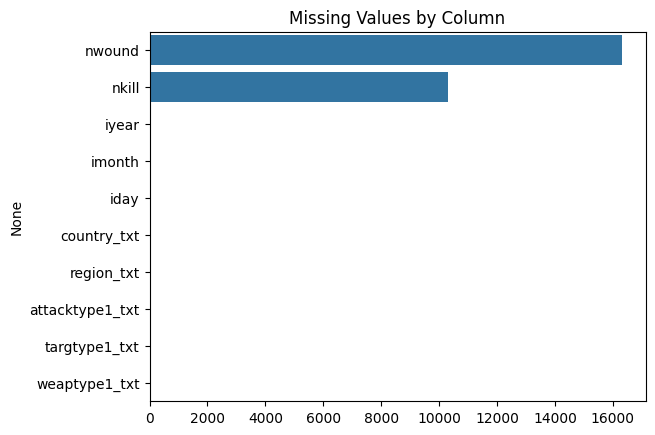

In [36]:

missing = df.isnull().sum().sort_values(ascending=False)
sns.barplot(x=missing.values, y=missing.index)
plt.title('Missing Values by Column')
plt.show()


C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\1433044701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='iyear', data=df, palette='magma',


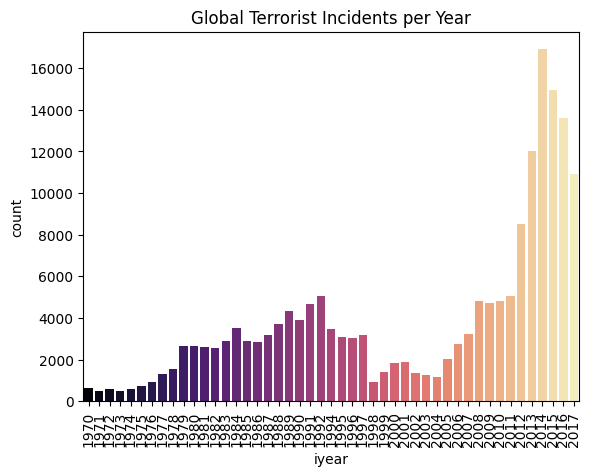

In [37]:
sns.countplot(x='iyear', data=df, palette='magma', 
              order=sorted(df['iyear'].unique()))
plt.title('Global Terrorist Incidents per Year')
plt.xticks(rotation=90)
plt.show()


C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\2747183843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index,palette='magma')


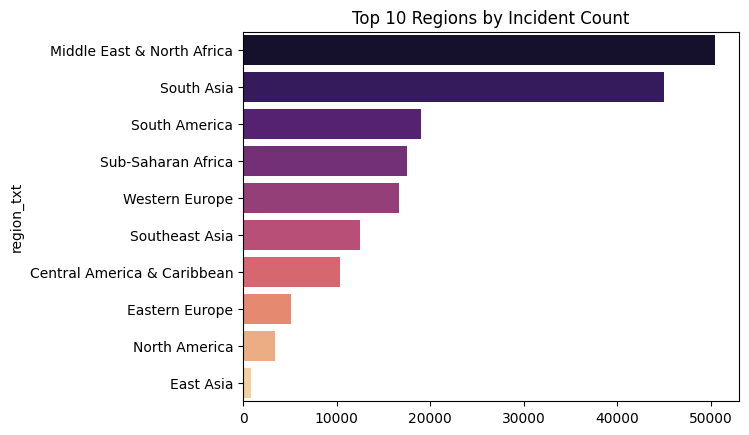

C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\2747183843.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index,palette='magma')


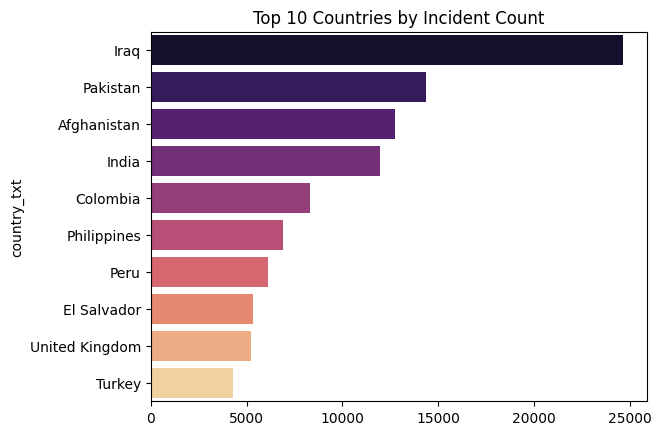

In [38]:
top_regions = df['region_txt'].value_counts().nlargest(10)
sns.barplot(x=top_regions.values, y=top_regions.index,palette='magma')
plt.title('Top 10 Regions by Incident Count')
plt.show()

top_countries = df['country_txt'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index,palette='magma')
plt.title('Top 10 Countries by Incident Count')
plt.show()


C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\1056465718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atype.values, y=atype.index,palette='magma')


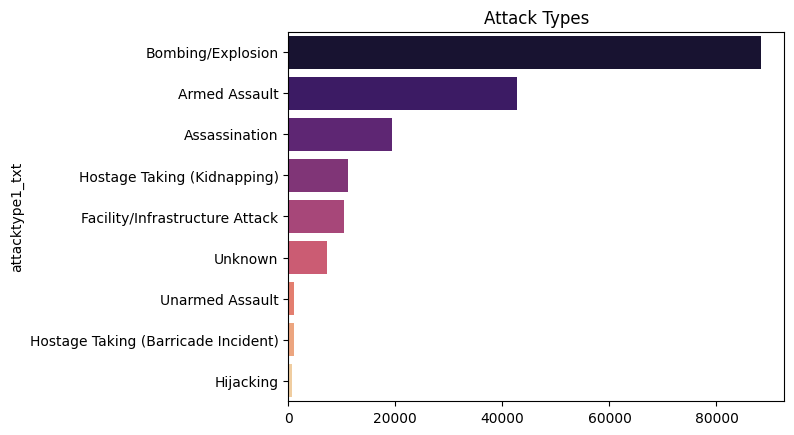

In [39]:
atype = df['attacktype1_txt'].value_counts()
sns.barplot(x=atype.values, y=atype.index,palette='magma')
plt.title('Attack Types')
plt.show()


C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\1154317464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['casualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)


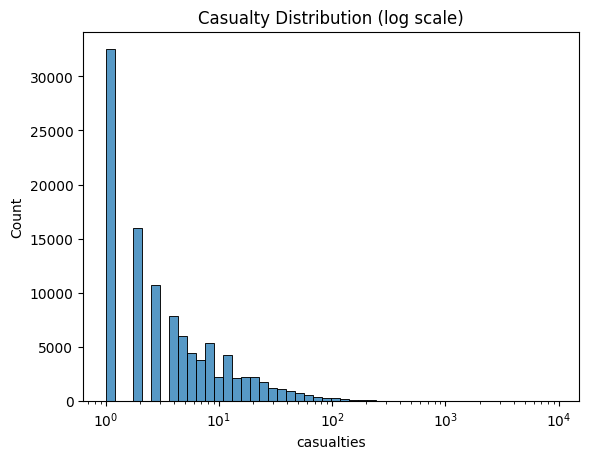

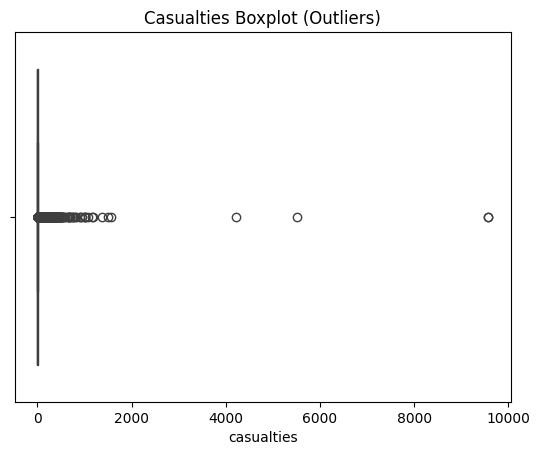

In [40]:
df['casualties'] = df['nkill'].fillna(0) + df['nwound'].fillna(0)
sns.histplot(df['casualties'], log_scale=True, bins=50)
plt.title('Casualty Distribution (log scale)')
plt.show()

sns.boxplot(x=df['casualties'])
plt.title('Casualties Boxplot (Outliers)')
plt.show()


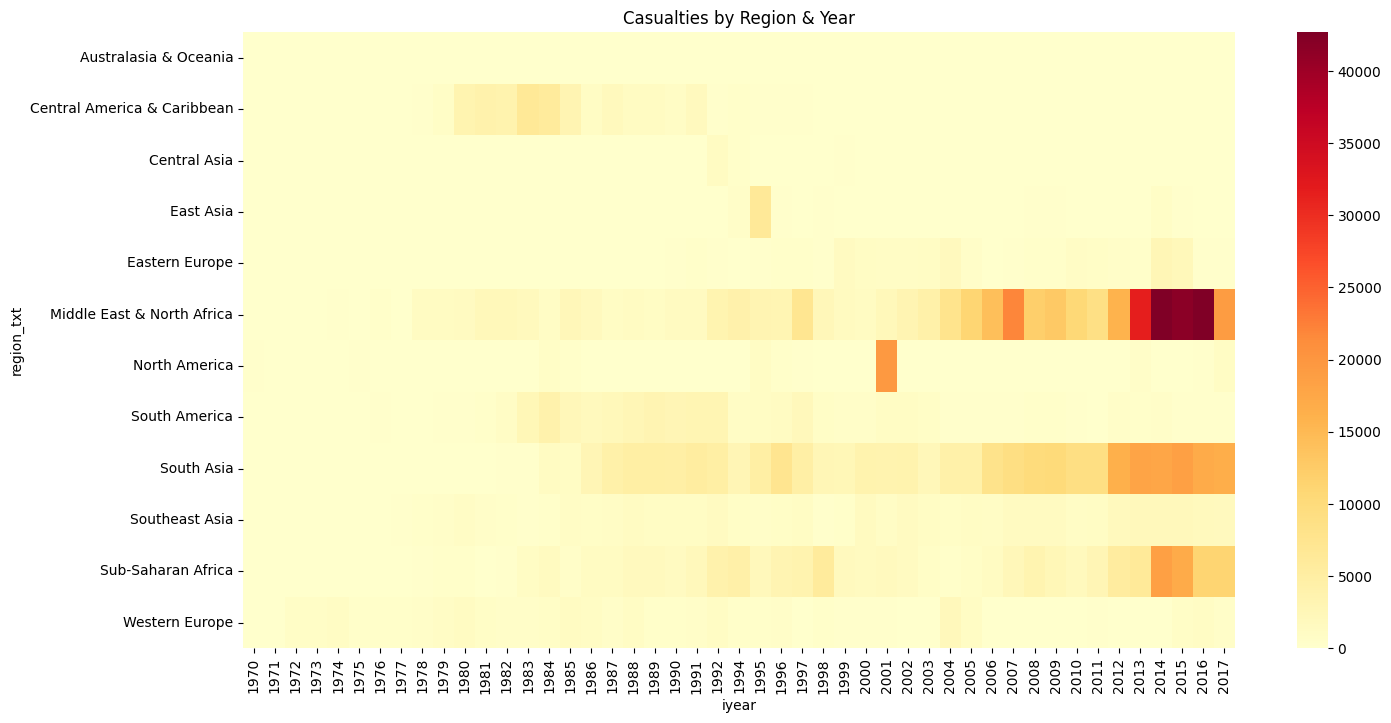

In [41]:
pivot = df.pivot_table(index='region_txt', columns='iyear',
                       values='casualties', aggfunc='sum').fillna(0)
plt.figure(figsize=(16,8))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Casualties by Region & Year')
plt.show()


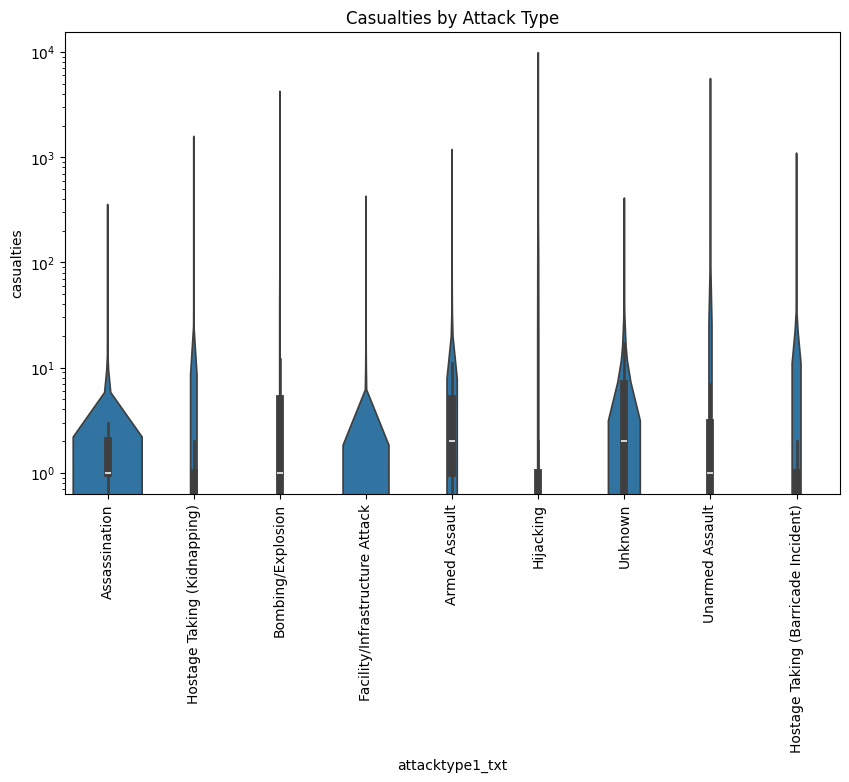

In [42]:
plt.figure(figsize=(10,6))
sns.violinplot(x='attacktype1_txt', y='casualties', data=df)
plt.yscale('log')
plt.title('Casualties by Attack Type')
plt.xticks(rotation=90)
plt.show()


C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\3432822857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['imonth']


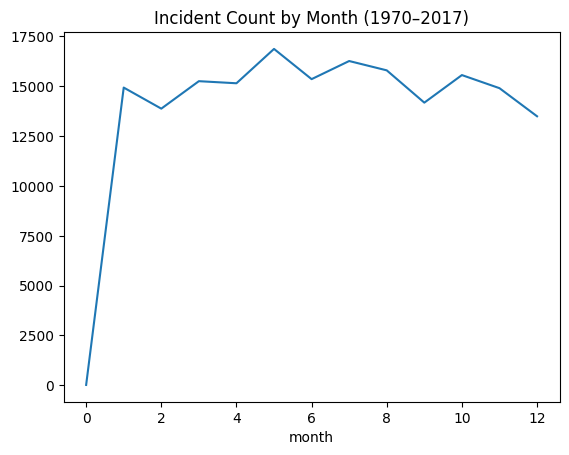

In [43]:
df['month'] = df['imonth']
monthly = df.groupby('month').size()
sns.lineplot(x=monthly.index, y=monthly.values)
plt.title('Incident Count by Month (1970–2017)')
plt.show()


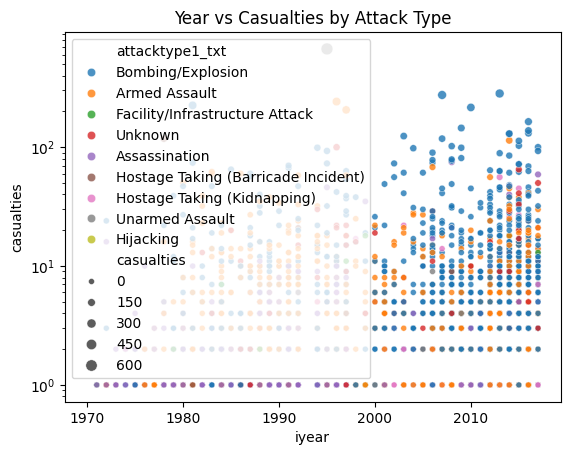

In [44]:
sns.scatterplot(data=df.sample(5000), x='iyear', y='casualties',
                hue='attacktype1_txt', size='casualties',
                alpha=0.8)
plt.yscale('log')
plt.title('Year vs Casualties by Attack Type')
plt.show()

## Summary & Insights

- **South Asia & Middle East** are the most affected regions.
- **Bombings and armed assaults** are the most frequent and deadliest attack types.
- **Seasonality is mild**, but peaks are observed in some mid-year months.
- **Casualty distribution** is heavily skewed, with a few high-impact attacks.

This structured approach allowed us to extract real insights from the GTD without being overwhelmed by the dataset's size and complexity.


In [46]:
import folium
from folium.plugins import MarkerCluster

# Filter high casualty events
# Create high casualty dataframe safely from df_original
df_original['nkill'].fillna(0, inplace=True)
df_original['nwound'].fillna(0, inplace=True)
df_original['casualties'] = df_original['nkill'] + df_original['nwound']

# Filter only rows with valid lat-long and high casualties
high_casualty_df = df_original[
    (df_original['casualties'] > 50) &
    (df_original['latitude'].notnull()) &
    (df_original['longitude'].notnull())
]



# Create base map
map_ = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(map_)

# Add clustered markers
for _, row in high_casualty_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['country_txt']} ({row['iyear']})\nAttack: {row['attacktype1_txt']}\nCasualties: {int(row['casualties'])}",
        icon=folium.Icon(color='red' if row['nkill'] > 10 else 'blue')
    ).add_to(marker_cluster)

# Save as interactive HTML map
map_.save('GTD_High_Casualty_Map.html')


C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\381545272.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original['nkill'].fillna(0, inplace=True)
C:\Users\Preeti Deora\AppData\Local\Temp\ipykernel_12364\381545272.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [48]:
import plotly.express as px


# Plotly scatter geo plot
fig = px.scatter_geo(
    high_casualty_df,
    lat='latitude',
    lon='longitude',
    color='region_txt',
    size='casualties',
    hover_name='country_txt',
    projection='natural earth',
    title='🌍 Major Terror Attacks (Casualties > 50)',
    template='plotly_dark'
)
fig.show()


In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px



# Keep only valid rows for clustering
cluster_data = df_original[['latitude', 'longitude', 'casualties']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_data)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_data['cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Combine back with original for plotting
# We'll merge using the index to maintain alignment
cluster_result = df_original.loc[cluster_data.index].copy()
cluster_result['cluster'] = cluster_data['cluster']

# Step 4: Plot Clustered Map
fig = px.scatter_geo(
    cluster_result,
    lat='latitude', lon='longitude',
    color='cluster',
    title='🌍 Terrorism Clusters Detected via KMeans (Casualties + Geo)',
    projection='natural earth',
    hover_name='country_txt',
    template='plotly_dark'
)
fig.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_df = df_original[['iyear', 'imonth', 'latitude', 'longitude', 'casualties', 'attacktype1_txt']].dropna()

# Select Features
features = model_df[['iyear', 'imonth', 'latitude', 'longitude', 'casualties']]
features = features.dropna()
target = model_df['attacktype1_txt'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                                     precision    recall  f1-score   support

                      Armed Assault       0.56      0.56      0.56      8222
                      Assassination       0.57      0.49      0.53      3764
                  Bombing/Explosion       0.71      0.82      0.76     17369
     Facility/Infrastructure Attack       0.60      0.47      0.53      2037
                          Hijacking       0.25      0.06      0.10       126
Hostage Taking (Barricade Incident)       0.30      0.10      0.16       192
        Hostage Taking (Kidnapping)       0.49      0.30      0.37      2134
                    Unarmed Assault       0.46      0.22      0.30       197
                            Unknown       0.41      0.20      0.27      1386

                           accuracy                           0.64     35427
                          macro avg       0.48      0.36      0.40     35427
                       weighted avg       0.62      0.64      0.62     354